## Text classification
NLP Model with DistilBERT

In [59]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

def plot_confusion_matrix(y_preds, y_true, labels):
    cm = confusion_matrix(y_true, y_preds, normalize="true")
    fig, ax = plt.subplots(figsize=(6, 6))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
    plt.title("Normalized confusion matrix")
    plt.show()

In [60]:
# Import necessary libraries
from datasets import load_dataset

# Set the device to use for computations
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Print the device being used
print(f"Using device: {device}\n")

# Use CPU
use_cpu = True if device.type == 'cpu' else False

# Print whether CPU is being used
print(f"Using CPU: {use_cpu}\n")

# Load the emotion dataset
emotions = load_dataset("emotion")

# Display the type and structure of the dataset
print(f"Actual type of emotions:\n{type(emotions)}\n")
print(f"Actual content of emotions:\n{emotions}\n")

Using device: cuda

Using CPU: False

Actual type of emotions:
<class 'datasets.dataset_dict.DatasetDict'>

Actual content of emotions:
DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})



In [61]:
# Plot the distribution of emotions in the dataset
emotions.set_format("pandas")

# Display type and content of the dataset
print(f"Actual type of emotions:\n{type(emotions)}\n")
print(f"Actual content of emotions:\n{emotions}\n")

# Convert the dataset to a pandas DataFrame
emotions_df = emotions["train"][:]

# Display type and content of the DataFrame
print(f"Actual type of emotions_df:\n{type(emotions_df)}\n")
print(f"Actual content of emotions_df:\n{emotions_df}\n")


Actual type of emotions:
<class 'datasets.dataset_dict.DatasetDict'>

Actual content of emotions:
DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

Actual type of emotions_df:
<class 'pandas.core.frame.DataFrame'>

Actual content of emotions_df:
                                                    text  label
0                                i didnt feel humiliated      0
1      i can go from feeling so hopeless to so damned...      0
2       im grabbing a minute to post i feel greedy wrong      3
3      i am ever feeling nostalgic about the fireplac...      2
4                                   i am feeling grouchy      3
...                                                  ...    ...
15995  i just had a very brief time in the beanbag an...      0
15996

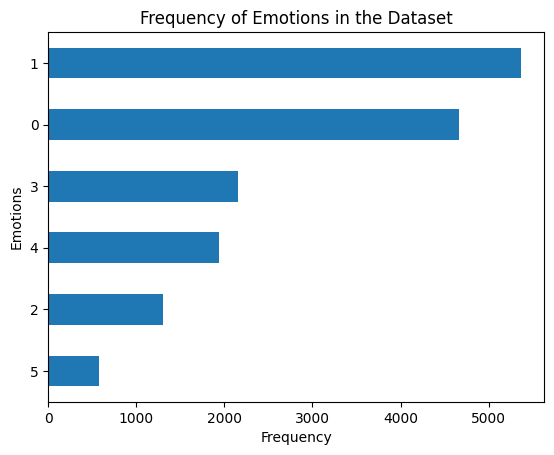

In [62]:
# Import the necessary libraries
import matplotlib.pyplot as plt

# Plot the distribution of emotions in the dataset
emotions_df["label"].value_counts(ascending=True).plot.barh()
plt.title("Frequency of Emotions in the Dataset")
plt.xlabel("Frequency")
plt.ylabel("Emotions")
plt.show()

In [63]:
# Import the necessary libraries
from transformers import AutoTokenizer

# Load the checkpoint for the tokenizer
model_ckpt = "distilbert-base-uncased"

# Initialize the tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

# Display the type and content of the tokenizer
print(f"Actual type of tokenizer:\n{type(tokenizer)}\n")
print(f"Actual content of tokenizer:\n{tokenizer}\n")

Actual type of tokenizer:
<class 'transformers.models.distilbert.tokenization_distilbert_fast.DistilBertTokenizerFast'>

Actual content of tokenizer:
DistilBertTokenizerFast(name_or_path='distilbert-base-uncased', vocab_size=30522, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=False, added_tokens_decoder={
	0: AddedToken("[PAD]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	100: AddedToken("[UNK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	101: AddedToken("[CLS]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	102: AddedToken("[SEP]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	103: AddedToken("[MASK]", rstrip=False, lstrip=False, single_word=False, n

In [64]:
# Define a function to tokenize the dataset
def tokenize_function(batch):
    return tokenizer(batch["text"], padding=True, truncation=True)

In [65]:
# Convert the dataset to torch format
emotions.set_format("torch")

# Display the type and content of emotions
print(f"Actual type of emotions:\n{type(emotions)}\n")
print(f"Actual content of emotions:\n{emotions}\n")

# Tokenize the dataset
emotions_encoded = emotions.map(tokenize_function, batched=True, batch_size=None)

# Display the type and contet of emotions_encoded
print(f"Actual type of emotions_encoded:\n{type(emotions_encoded)}\n")
print(f"Actual content of emotions_encoded:\n{emotions_encoded}\n")

Actual type of emotions:
<class 'datasets.dataset_dict.DatasetDict'>

Actual content of emotions:
DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})



Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Actual type of emotions_encoded:
<class 'datasets.dataset_dict.DatasetDict'>

Actual content of emotions_encoded:
DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
})



In [66]:
# Import necessary libraries
from transformers import AutoModel

# Load the pretrained model and move it to the specified device
model = AutoModel.from_pretrained(model_ckpt).to(device)

# Display the type and content of the model
print(f"Actual type of model:\n{type(model)}\n")
print(f"Actual content of model:\n{model}\n")

Actual type of model:
<class 'transformers.models.distilbert.modeling_distilbert.DistilBertModel'>

Actual content of model:
DistilBertModel(
  (embeddings): Embeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (transformer): Transformer(
    (layer): ModuleList(
      (0-5): 6 x TransformerBlock(
        (attention): DistilBertSdpaAttention(
          (dropout): Dropout(p=0.1, inplace=False)
          (q_lin): Linear(in_features=768, out_features=768, bias=True)
          (k_lin): Linear(in_features=768, out_features=768, bias=True)
          (v_lin): Linear(in_features=768, out_features=768, bias=True)
          (out_lin): Linear(in_features=768, out_features=768, bias=True)
        )
        (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
        (ffn): FFN(
          (dropou

In [67]:
# Import necessary libraries
from transformers import AutoModelForSequenceClassification

# Set the number of labels for the classification task
num_labels = 6

# Load the pretrained model and move it to the specified device
model = AutoModelForSequenceClassification.from_pretrained(model_ckpt, num_labels=num_labels).to(device)

# Display the type and content of the model
print(f"Actual type of model:\n{type(model)}\n")
print(f"Actual content of model:\n{model}\n")

# Import necessary libraries
from transformers import DistilBertForSequenceClassification

# Load the pretrained model and move it to the specified device
model = DistilBertForSequenceClassification.from_pretrained(model_ckpt, num_labels=num_labels).to(device)

Actual type of model:
<class 'transformers.models.distilbert.modeling_distilbert.DistilBertForSequenceClassification'>

Actual content of model:
DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): DistilBertSdpaAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (

In [68]:
# Import the necessary libraries
from sklearn.metrics import accuracy_score, f1_score

# Define a function to compute the metrics
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    f1 = f1_score(labels, preds, average="weighted")
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "f1": f1}

In [69]:
# Import the necessary libraries
from transformers import TrainingArguments

batch_size = 16
logging_steps = len(emotions_encoded["train"]) // batch_size
model_name = f"{model_ckpt}-finetuned-emotion"

# Define the training arguments
training_args = TrainingArguments(
    output_dir=model_name,
    num_train_epochs=2,
    learning_rate=2e-5,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    weight_decay=0.01,
    disable_tqdm=False,
    logging_steps=logging_steps,
    log_level="error",
    use_cpu=use_cpu,
)

# Display the type and content of training_args
print(f"Actual type of training_args:\n{type(training_args)}\n")
print(f"Actual content of training_args:\n{training_args}\n")

Actual type of training_args:
<class 'transformers.training_args.TrainingArguments'>

Actual content of training_args:
TrainingArguments(
_n_gpu=1,
accelerator_config={'split_batches': False, 'dispatch_batches': None, 'even_batches': True, 'use_seedable_sampler': True, 'non_blocking': False, 'gradient_accumulation_kwargs': None, 'use_configured_state': False},
adafactor=False,
adam_beta1=0.9,
adam_beta2=0.999,
adam_epsilon=1e-08,
auto_find_batch_size=False,
average_tokens_across_devices=False,
batch_eval_metrics=False,
bf16=False,
bf16_full_eval=False,
data_seed=None,
dataloader_drop_last=False,
dataloader_num_workers=0,
dataloader_persistent_workers=False,
dataloader_pin_memory=True,
dataloader_prefetch_factor=None,
ddp_backend=None,
ddp_broadcast_buffers=None,
ddp_bucket_cap_mb=None,
ddp_find_unused_parameters=None,
ddp_timeout=1800,
debug=[],
deepspeed=None,
disable_tqdm=False,
do_eval=False,
do_predict=False,
do_train=False,
eval_accumulation_steps=None,
eval_delay=0,
eval_do_conca

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [70]:
from transformers import Trainer

trainer = Trainer(
    model = model,
    args = training_args,
    compute_metrics = compute_metrics,
    train_dataset = emotions_encoded["train"],
    eval_dataset = emotions_encoded["validation"],
    tokenizer = tokenizer,
)

# Display the type and content of the trainer
print(f"Actual type of trainer:\n{type(trainer)}\n")
print(f"Actual content of trainer:\n{trainer}\n")

Actual type of trainer:
<class 'transformers.trainer.Trainer'>

Actual content of trainer:



/tmp/ipykernel_18177/1759585347.py:3: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [71]:
# Train the model
trainer.train()

Step,Training Loss
1000,0.500700
2000,0.147400


TrainOutput(global_step=2000, training_loss=0.3240486145019531, metrics={'train_runtime': 158.7232, 'train_samples_per_second': 201.609, 'train_steps_per_second': 12.601, 'total_flos': 720342861696000.0, 'train_loss': 0.3240486145019531, 'epoch': 2.0})

In [72]:
preds_output = trainer.predict(emotions_encoded["test"])

# Display the type and content of preds_output
print(f"Actual type of preds_output:\n{type(preds_output)}\n")
print(f"Actual content of preds_output:\n{preds_output}\n")

# Display the type and content of preds_output.metrics
print(f"Actual type of preds_output.metrics:\n{type(preds_output.metrics)}\n")
print(f"Actual content of preds_output.metrics:\n{preds_output.metrics}\n")

Actual type of preds_output:
<class 'transformers.trainer_utils.PredictionOutput'>

Actual content of preds_output:
PredictionOutput(predictions=array([[ 6.260294 , -0.9776847, -1.6417962, -0.9957253, -1.5342512,
        -2.4566238],
       [ 6.261336 , -1.0980879, -1.5351146, -0.9789647, -1.5325044,
        -2.4451425],
       [ 6.2957053, -1.2065431, -1.6407982, -1.2618804, -1.1884197,
        -2.3964736],
       ...,
       [-1.1220503,  6.2975316, -1.0781802, -1.9238647, -1.9995522,
        -1.6323285],
       [-0.9020463,  6.0972757, -1.2354444, -1.9527782, -1.5094322,
        -1.8920273],
       [-1.7444773, -1.8308815, -1.9005495, -2.0714965,  2.9643428,
         2.84394  ]], dtype=float32), label_ids=array([0, 0, 0, ..., 1, 1, 4]), metrics={'test_loss': 0.17407453060150146, 'test_accuracy': 0.923, 'test_f1': 0.9227900746071418, 'test_runtime': 2.1695, 'test_samples_per_second': 921.851, 'test_steps_per_second': 57.616})

Actual type of preds_output.metrics:
<class 'dict'>

Actu

In [75]:
import numpy as np

y_preds = np.argmax(preds_output.predictions, axis=1)

# Display the type and content of y_preds
print(f"Actual type of y_preds:\n{type(y_preds)}\n")
print(f"Actual content of y_preds:\n{y_preds}\n")


Actual type of y_preds:
<class 'numpy.ndarray'>

Actual content of y_preds:
[0 0 0 ... 1 1 4]



In [76]:
# Count the number of predictions for each label
from collections import Counter
label_counts = Counter(y_preds)
# Display the counts of predictions for each label
print(f"Counts of predictions for each label:\n{label_counts}\n")
# Display the counts of predictions for each label as a dictionary
label_counts_dict = dict(label_counts)

label_counts_dict

Counts of predictions for each label:
Counter({np.int64(1): 694, np.int64(0): 585, np.int64(3): 275, np.int64(4): 221, np.int64(2): 163, np.int64(5): 62})



{np.int64(0): 585,
 np.int64(1): 694,
 np.int64(4): 221,
 np.int64(3): 275,
 np.int64(2): 163,
 np.int64(5): 62}

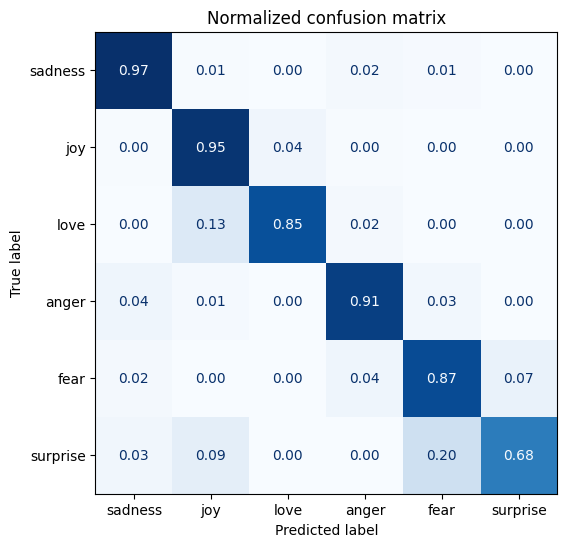

In [77]:
y_valid = emotions_encoded["test"]["label"]
labels = emotions["train"].features["label"].names

plot_confusion_matrix(y_preds, y_valid, labels)